In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

#getting available filenames
lms = ["xlmRBase", "xlmRLarge", "mBertUncased", "mBertCased", "nbBertBase", "nbBertLarge", "norbert", "norbert2"]
tags = ["i100_r0","i100_r1","i100_r2","i200_r0","i200_r1","i300_r0"]
allFiles = []

for lm in lms:
    for tag in tags:
        allFiles.append(f"{lm}_{tag}")

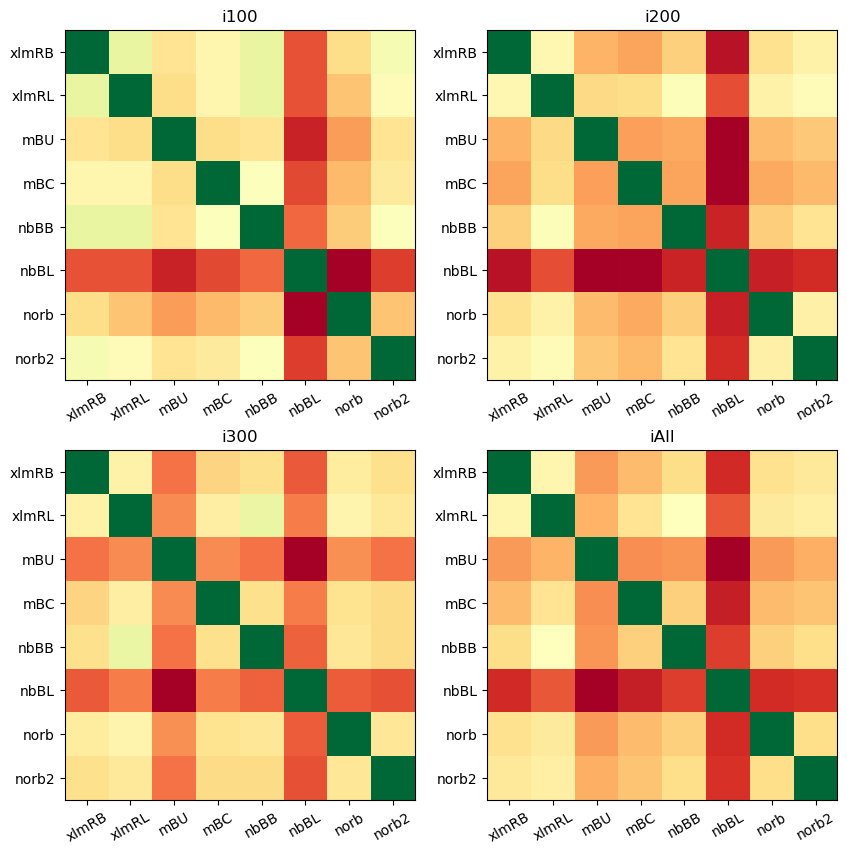

In [ ]:
#####################################################################################################################
# symetric diff

def formatData(file):
    with open(f"output_data/runsFilteredTotal/{file}.csv", mode = "r",encoding="UTF-8") as f:
        data = f.readlines()[1:]
        data = list(map(lambda x: x.split(";")[1].split(" ---> "),data)) # seperate ant and con
        data = list(map(lambda x: (set(x[0].split(" & ")), x[1]),data)) # seperate ant on &

    return data

def symdiff(file1, file2):
    data1 = formatData(file1)
    data2 = formatData(file2)
    concat = data1 + data2

    mutual = list(filter(lambda x: x in data1, data2))
    symdiff = list(filter(lambda x: x not in mutual, concat))
    return (symdiff, len(symdiff))

def createSymdiffMatrix(itag):
    matrix = []
    for f1 in lms:
        vector = []
        for f2 in lms:
            vector.append(symdiff(f"{f1 + itag}",f"{f2 + itag}")[1])
        matrix.append(vector)
    return matrix

i100 = createSymdiffMatrix("_i100")
i200 = createSymdiffMatrix("_i200")
i300 = createSymdiffMatrix("_i300")
iAll = createSymdiffMatrix("_iAll(weighted)")

lms_ = ["xlmRB", "xlmRL", "mBU", "mBC", "nbBB", "nbBL", "norb", "norb2"]
figure, axis = plt.subplots(2, 2, figsize=(10, 10))

def setHeatmap(matrix, title, position):
    x,y = position
    axis[x, y].imshow(matrix, cmap='RdYlGn_r', interpolation='nearest')
    axis[x, y].set_xticks(ticks=np.arange(len(lms_)), labels=lms_, rotation=30)
    axis[x, y].set_yticks(ticks=np.arange(len(lms_)), labels=lms_)
    axis[x, y].set_title(title)

setHeatmap(i100, "i100", [0,0])
setHeatmap(i200, "i200", [0,1])
setHeatmap(i300, "i300", [1,0])
setHeatmap(iAll, "iAll", [1,1])
plt.show()